In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

data = pd.read_csv(r"C:\Users\anasw\Downloads\Quality Assessment - Quality Assesment.csv")
df = pd.DataFrame(data)

df.head()

,Id,Assembly Line,Quantity (lts.),CO2 dissolved,Time limit Crossed
0,1263945,B,1.971072,14.401617,0
1,1828129,B,2.073388,14.137750,0
2,1871804,A,2.019492,14.774384,0
3,1128634,A,2.004422,15.130565,0
4,1848595,B,2.025784,15.756478,0


In [2]:
df.isna().sum()

Id                    0
Assembly Line         0
Quantity (lts.)       6
CO2 dissolved         0
Time limit Crossed    0
dtype: int64

In [3]:
df.duplicated().sum()

0

In [5]:
round(df["Quantity (lts.)"].median(),3)

1.998

In [61]:
R1 = df["CO2 dissolved"].min()
R2 = df["CO2 dissolved"].max()

RA = R2-R1
round(RA,2)



4.32

In [9]:
df.describe()

,Id,Quantity (lts.),CO2 dissolved,Time limit Crossed
count,2.990000e+02,293.000000,299.000000,299.000000
mean,1.506447e+06,1.997992,15.983235,0.180602
std,2.913488e+05,0.048517,15.322285,0.385333
min,1.004988e+06,1.891835,2.253454,0.000000
25%,1.240662e+06,1.968372,13.109196,0.000000
50%,1.520300e+06,1.997947,14.064673,0.000000
75%,1.747329e+06,2.030391,15.139656,0.000000
max,1.999475e+06,2.109917,150.180978,1.000000


In [10]:
df["Assembly Line"].nunique()

4

In [11]:
df["Time limit Crossed"]

0      0
1      0
2      0
3      0
4      0
      ..
294    0
295    1
296    0
297    1
298    1
Name: Time limit Crossed, Length: 299, dtype: int64

In [15]:
df["Assembly Line"]

0      B
1      B
2      A
3      A
4      B
      ..
294    A
295    B
296    B
297    B
298    a
Name: Assembly Line, Length: 299, dtype: object

In [18]:
df["Assembly Line"] = df["Assembly Line"].replace("b" , "B")
df["Assembly Line"] = df["Assembly Line"].replace("a" , "A")

df["Assembly Line"].nunique()

2

In [22]:
df["Quantity (lts.)"]= df["Quantity (lts.)"].fillna(df["Quantity (lts.)"].mean())

df["Quantity (lts.)"].isna().sum()

0

In [25]:
df["Time limit Crossed"].values.sum()

54

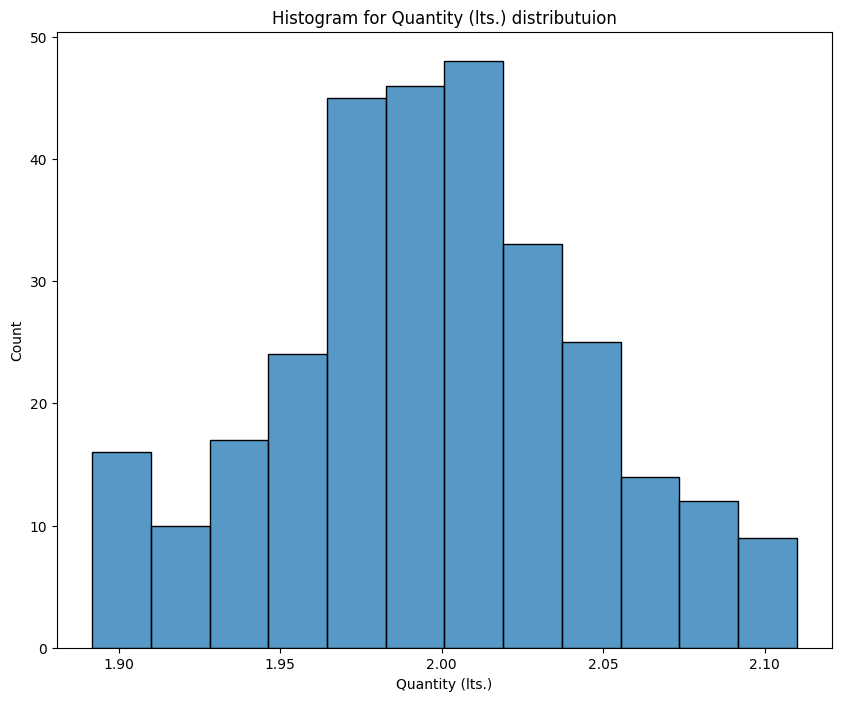

In [26]:
plt.figure(figsize=(10,8))
sns.histplot(x = df["Quantity (lts.)"])
plt.title("Histogram for Quantity (lts.) distributuion")
plt.plot()
plt.show()

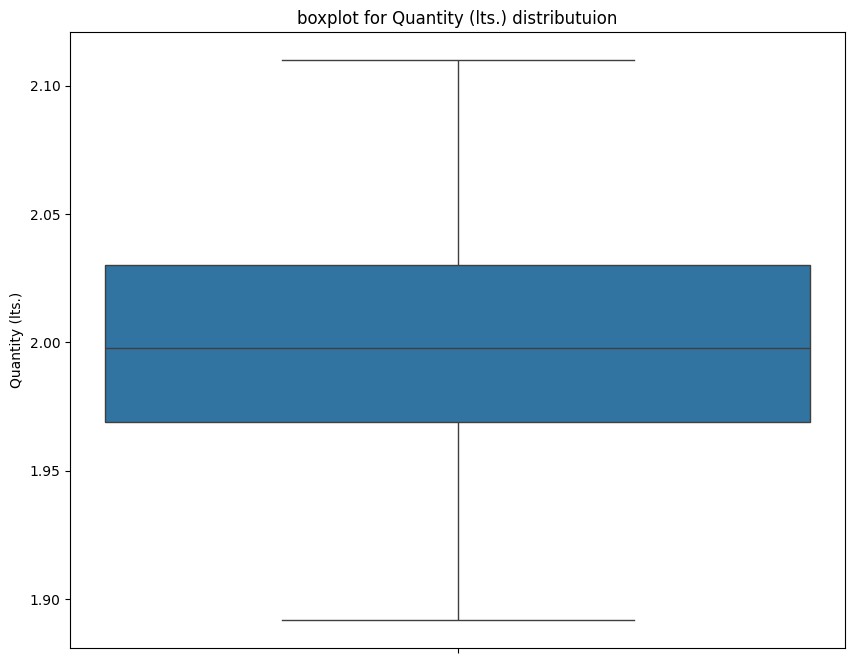

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(y = df["Quantity (lts.)"])
plt.title("boxplot for Quantity (lts.) distributuion")
plt.plot()
plt.show()

C:\Users\anasw\AppData\Local\Temp\ipykernel_4688\150254538.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.barplot(x=df["Assembly Line"], y=df["Time limit Crossed"], color='skyblue', alpha=0.7 , hue=df["Assembly Line"])


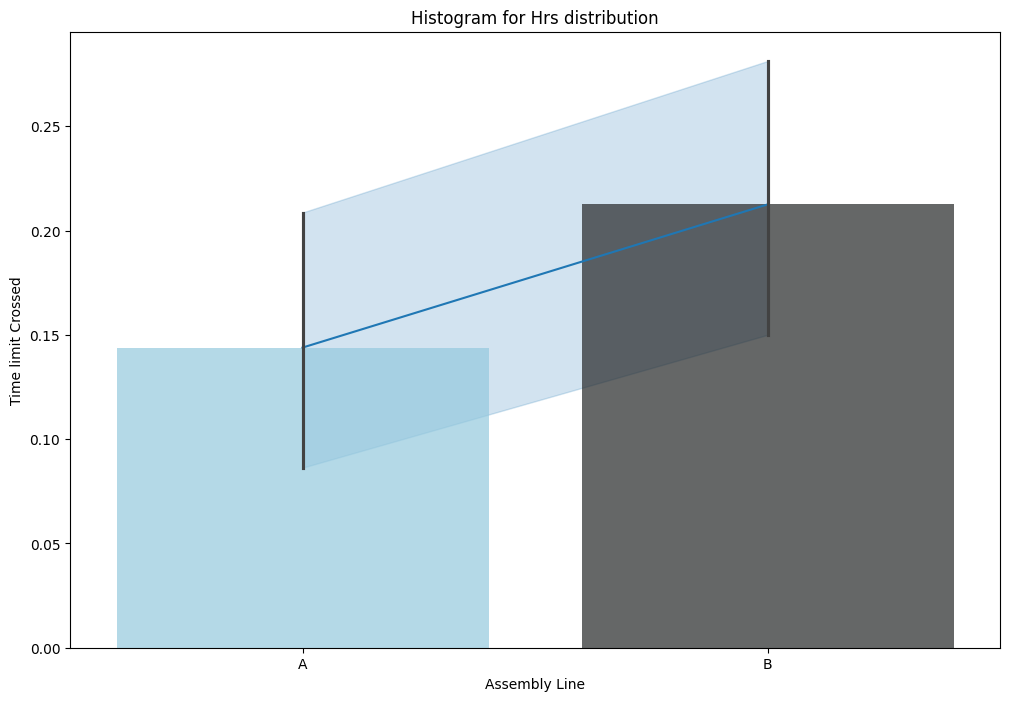

In [40]:

plt.figure(figsize=(12, 8))

# Lineplot
sns.lineplot(x=df["Assembly Line"], y=df["Time limit Crossed"])

# Bar plot
sns.barplot(x=df["Assembly Line"], y=df["Time limit Crossed"], color='skyblue', alpha=0.7 , hue=df["Assembly Line"])

plt.title("Histogram for Hrs distribution")
plt.gca().invert_xaxis()  # Invert x-axis
plt.show()



In [43]:
correlation = df["CO2 dissolved"].corr(df["Quantity (lts.)"])
round(correlation,2)

0.05

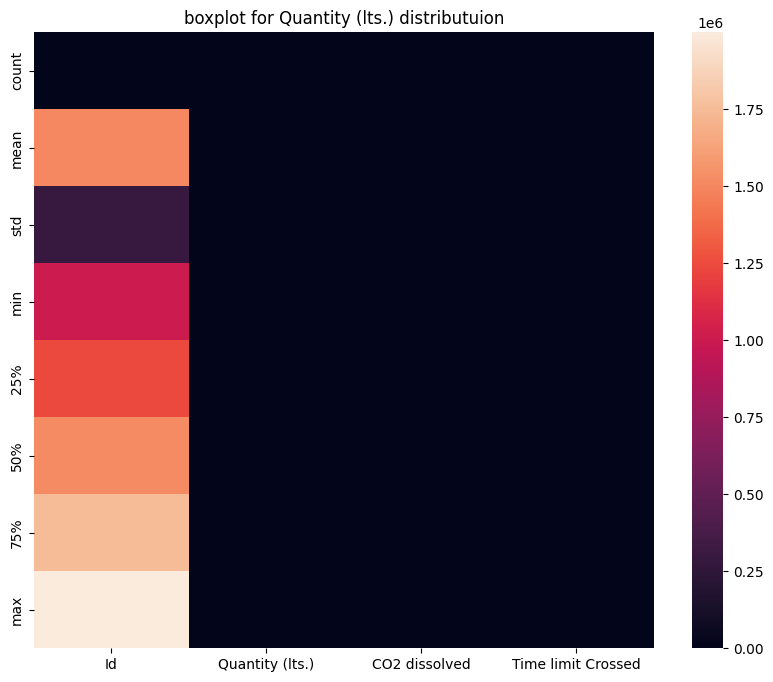

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(df.describe())
plt.title("boxplot for Quantity (lts.) distributuion")
plt.plot()
plt.show()

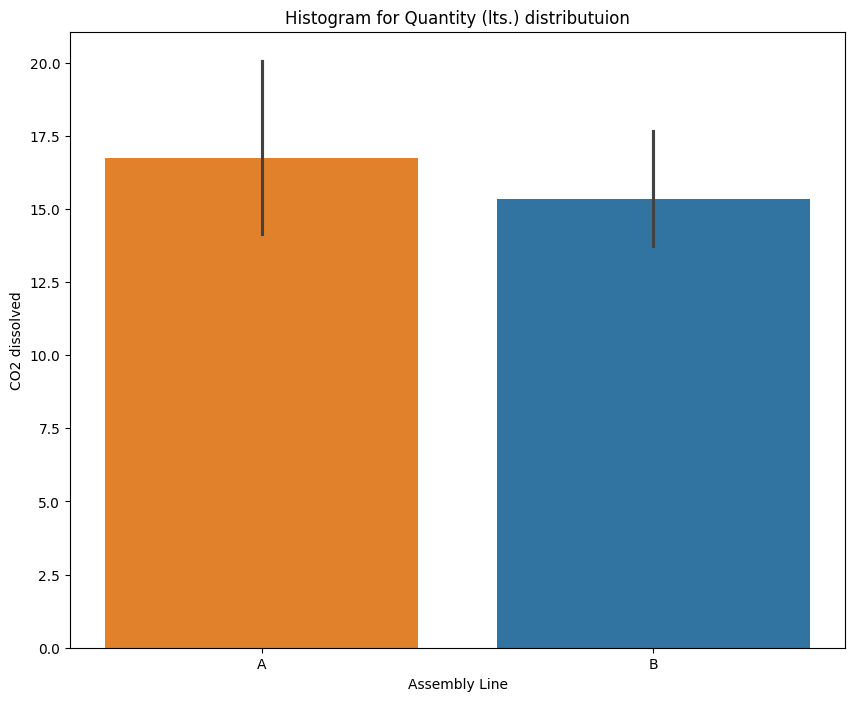

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(x = df["Assembly Line"] , y = df["CO2 dissolved"] , hue=df["Assembly Line"])
plt.title("Histogram for Quantity (lts.) distributuion")
plt.gca().invert_xaxis()  # Invert x-axis
plt.plot()
plt.show()

In [60]:
q3 = df["CO2 dissolved"].quantile(0.75)
q1 = df["CO2 dissolved"].quantile(0.25)

iqr = q3 - q1 
lower_cutoff = round(q1 - 1.5 * iqr, 2)
upper_cutoff = round(q1 + 1.5 * iqr, 2)

outliers = (df["CO2 dissolved"] < lower_cutoff) | (df["CO2 dissolved"] > upper_cutoff)


print(lower_cutoff)
print(upper_cutoff)

10.05
16.18


In [55]:
mean_CO2_dissolved = df[~df.index.isin(outliers)]["CO2 dissolved"].mean()

# Replace outliers with the mean
df.loc[outliers, "CO2 dissolved"] = mean_CO2_dissolved

In [56]:
df["CO2 dissolved"].mean()

14.078011976069615

In [66]:
q3 = df["CO2 dissolved"].quantile(0.75)
q1 = df["CO2 dissolved"].quantile(0.25)

iqr = q3 - q1 
lower_cutoff = round(q1 - 1.5 * iqr, 2)
upper_cutoff = q1 + 1.5 * iqr

print(lower_cutoff)
print(upper_cutoff)

10.05
16.1839147525


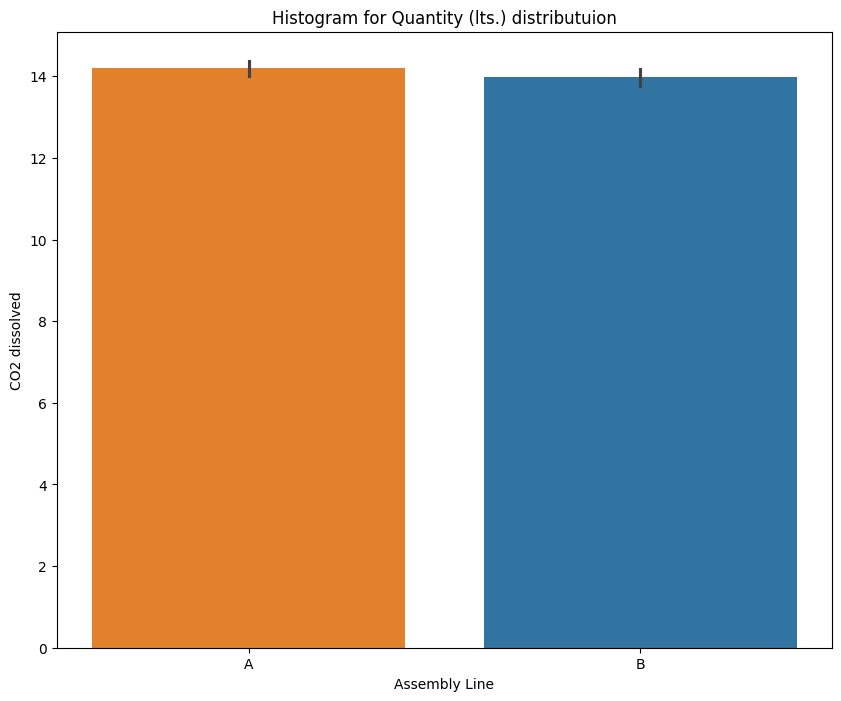

In [62]:
plt.figure(figsize=(10,8))
sns.barplot(x = df["Assembly Line"] , y = df["CO2 dissolved"] , hue=df["Assembly Line"])
plt.title("Histogram for Quantity (lts.) distributuion")
plt.gca().invert_xaxis()  # Invert x-axis
plt.plot()
plt.show()

In [103]:
# Calculate the total count of "Time limit crossed"
total_time_limit_crossed = df["Time limit Crossed"].value_counts().sum()

# Calculate the probability of "Time limit crossed" for Assembly Line A
p1 = total_time_limit_crossed/df[df["Assembly Line"] == "A"]["Time limit Crossed"].value_counts().sum()
print("Probability of Time limit crossed for Assembly Line A:", p1)

# Calculate the probability of "Time limit crossed" for Assembly Line B
p2 = total_time_limit_crossed/df[df["Assembly Line"] == "B"]["Time limit Crossed"].value_counts().sum() 
print("Probability of Time limit crossed for Assembly Line B:", p2)



Probability of Time limit crossed for Assembly Line A: 2.1510791366906474
Probability of Time limit crossed for Assembly Line B: 1.86875


In [96]:
df["Time limit Crossed"]

0      0
1      0
2      0
3      0
4      0
      ..
294    0
295    1
296    0
297    1
298    1
Name: Time limit Crossed, Length: 299, dtype: int64

In [107]:
from scipy.stats import binom

# p of outstanding 
pab = 0.21
n = 50
k = 10

check = binom(n,pab)
round(check.pmf(k),2)

0.14

In [109]:
# p of outstanding 
paa = 0.14
n = 50
k = 10

check = binom(n,paa)
round(check.pmf(k),2)

0.07

In [113]:
pab = 0.21
n = 50
k = 10

check = binom(n,pab)
r = 1 - check.cdf(k)
round(r,2)

0.49

In [114]:
paa = 0.14
n = 50
k = 10

check = binom(n,paa)
r_2 = 1 - check.cdf(k)
round(r_2,2)

0.08

In [121]:
from scipy.stats import norm

mean = df["Quantity (lts.)"].mean()
std = df["Quantity (lts.)"].std()

threshold = 1.95
uppr_threshold = 2.05

# Calculate the probability that quantity is below the threshold
prob_threshold = norm.cdf(uppr_threshold, loc=mean, scale=std) - norm.cdf(threshold , loc=mean , scale = std)

# Probability of penalization or spillage is the complement of the probability below the threshold
prob_threshold

round(prob_threshold,2)



0.7

In [127]:
from scipy.stats import norm

# Given values
mean = 2.0  # Mean net content
std_dev = 0.05  # Standard deviation of net content

# Thresholds for penalization and excess spillage
penalization_threshold = 1.90  # Below this threshold, penalization may occur
spillage_threshold = 2.10  # Above this threshold, excess spillage may occur

# Calculate the probability of net content below penalization threshold
prob_penalization = norm.cdf(penalization_threshold, loc=mean, scale=std_dev)

# Calculate the probability of net content above spillage threshold
prob_spillage = 1 - norm.cdf(spillage_threshold, loc=mean, scale=std_dev)

# Calculate the combined probability (accounting for overlap)
prob_combined = prob_penalization + prob_spillage - (prob_penalization * prob_spillage)

# Round the combined probability to two decimal places
prob_combined_rounded = round(prob_combined, 2)

print("Combined probability of penalization or excess spillage:", prob_combined_rounded)


Combined probability of penalization or excess spillage: 0.04


In [130]:
import numpy as np
from scipy.stats import norm

# Sample data (mean and standard deviation)
sample_mean = df["Quantity (lts.)"].mean()
sample_std = df["Quantity (lts.)"].std()

# Number of observations
n = len(df["Quantity (lts.)"])

# Confidence level (1 - alpha)
confidence_level = 0.90

# Calculate the critical value (z-score) for the given confidence level
z = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the margin of error
margin_of_error = z * (sample_std / np.sqrt(n))

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("90% Confidence Interval for Quantity variable:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


90% Confidence Interval for Quantity variable:
Lower Bound: 1.9934236606604332
Upper Bound: 2.0025606405750613
